In [ ]:
'''

회귀와 예측
단순선형회귀
다중선형회귀
회귀를 이용한 예측
회귀에서의 요인변수
회귀방정식 해석
회귀진단
다항회귀와 스플라인 회귀

'''

'\n회귀와 예측\n단순선형회귀\n다중선형회귀\n회귀를 이용한 예측\n회귀에서의 요인변수\n회귀방정식 해석\n회귀진단\n다항회귀와 스플라인 회귀\n\n분류\n나이브 베이즈\n판별분석\n로지스틱 회귀\n분류 모델 평가하기\n불균형 데이터 다루기\n\n통계적 머신러닝\nk-최근접 이웃\n트리 모델\n배깅과 랜덤 포레스트\n부스팅\n\n비지도 학습\n주성분분석\nk-평균 클러스터링\n계층적 클러스터링\n모델 기반 클러스터링\n스케일링과 범주형 변수\n'

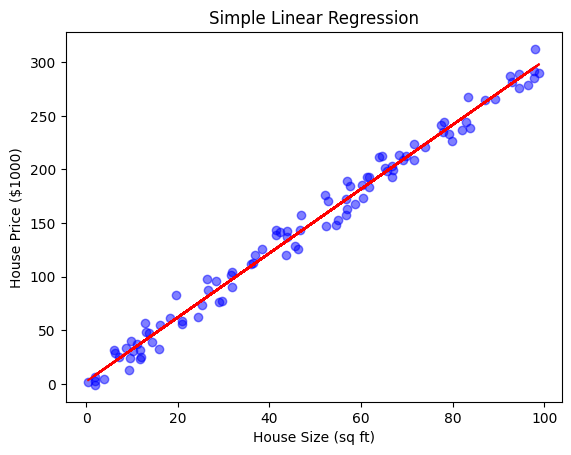

Coefficient: 2.9936935021402036
Intercept: 2.2215107744722786


In [ ]:
'''
단순선형회귀 (Simple Linear Regression)
실생활 예시: 집 크기(평수)와 집 가격 간의 관계를 분석하여 집 가격을 예측합니다.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 생성 (집 크기와 가격)
np.random.seed(0)  # 랜덤 시드 설정
house_size = np.random.rand(100) * 100  # 0에서 100 사이의 랜덤한 집 크기 (평수)
house_price = house_size * 3 + np.random.randn(100) * 10  # 집 크기에 비례한 집 가격 (노이즈 추가)

# 데이터프레임 생성
data = pd.DataFrame({'Size': house_size, 'Price': house_price})  # 데이터프레임 생성

# 단순선형회귀 모델 생성
model = LinearRegression()  # LinearRegression 모델 생성
model.fit(data[['Size']], data['Price'])  # 모델 학습

# 회귀선 그리기
plt.scatter(data['Size'], data['Price'], color='blue', alpha=0.5)  # 데이터 산점도
plt.plot(data['Size'], model.predict(data[['Size']]), color='red')  # 회귀선
plt.xlabel('House Size (sq ft)')  # x축 라벨
plt.ylabel('House Price ($1000)')  # y축 라벨
plt.title('Simple Linear Regression')  # 그래프 제목
plt.show()  # 그래프 출력

# 회귀 계수와 절편 출력
print(f"Coefficient: {model.coef_[0]}")  # 회귀 계수 출력
print(f"Intercept: {model.intercept_}")  # 절편 출력

In [ ]:
'''
다중선형회귀 (Multiple Linear Regression)
실생활 예시: 집 크기, 방 개수, 위치 등을 고려하여 집 가격을 예측합니다.
'''

# 데이터 생성 (집 크기, 방 개수, 위치, 가격)
np.random.seed(0)  # 랜덤 시드 설정
house_size = np.random.rand(100) * 100  # 0에서 100 사이의 랜덤한 집 크기 (평수)
num_rooms = np.random.randint(1, 6, 100)  # 1에서 5 사이의 랜덤한 방 개수
location = np.random.randint(1, 4, 100)  # 1에서 3 사이의 랜덤한 위치 (1: 도심, 2: 교외, 3: 시골)
house_price = house_size * 3 + num_rooms * 10 + location * 5 + np.random.randn(100) * 10  # 집 가격

# 데이터프레임 생성
data = pd.DataFrame({'Size': house_size, 'Rooms': num_rooms, 'Location': location, 'Price': house_price})  # 데이터프레임 생성

# 다중선형회귀 모델 생성
model = LinearRegression()  # LinearRegression 모델 생성
model.fit(data[['Size', 'Rooms', 'Location']], data['Price'])  # 모델 학습

# 회귀 계수와 절편 출력
print(f"Coefficients: {model.coef_}")  # 회귀 계수 출력
print(f"Intercept: {model.intercept_}")  # 절편 출력

Coefficients: [ 3.03009516 10.28342566  3.74016221]
Intercept: 0.016007884135916584


In [ ]:
'''
회귀를 이용한 예측 (Prediction using Regression)
실생활 예시: 새로운 집 크기와 방 개수, 위치를 입력받아 집 가격을 예측합니다.
'''

# 새로운 데이터 입력
new_data = pd.DataFrame({'Size': [70], 'Rooms': [3], 'Location': [2]})  # 새로운 데이터

# 예측
predicted_price = model.predict(new_data)  # 예측 수행
print(f"Predicted Price: {predicted_price[0]}")  # 예측된 가격 출력

Predicted Price: 250.45327029667536


In [ ]:
'''
회귀에서의 요인변수 (Factors in Regression)

실생활 예시: 위치를 요인변수로 고려하여 회귀 분석을 수행합니다.
'''

# 위치를 더미 변수로 변환
data = pd.get_dummies(data, columns=['Location'], drop_first=True)  # 더미 변수 생성

# 다중선형회귀 모델 생성
model = LinearRegression()  # LinearRegression 모델 생성
model.fit(data[['Size', 'Rooms', 'Location_2', 'Location_3']], data['Price'])  # 모델 학습

# 회귀 계수와 절편 출력
print(f"Coefficients: {model.coef_}")  # 회귀 계수 출력
print(f"Intercept: {model.intercept_}")  # 절편 출력


Coefficients: [ 3.02926733 10.30576074  5.59361674  7.38163935]
Intercept: 3.112774100647215


In [ ]:
'''
회귀방정식 해석 (Interpreting Regression Equation)
실생활 예시: 회귀 계수와 절편을 해석하여 각 변수의 영향을 설명합니다.
'''

# 회귀 계수와 절편 출력
print(f"Coefficients: {model.coef_}")  # 회귀 계수 출력
print(f"Intercept: {model.intercept_}")  # 절편 출력

# 해석
print("회귀 방정식: Price = {:.2f} + {:.2f}*Size + {:.2f}*Rooms + {:.2f}*Location_2 + {:.2f}*Location_3".format(
    model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3]))  # 회귀 방정식 출력


Coefficients: [ 3.02926733 10.30576074  5.59361674  7.38163935]
Intercept: 3.112774100647215
회귀 방정식: Price = 3.11 + 3.03*Size + 10.31*Rooms + 5.59*Location_2 + 7.38*Location_3


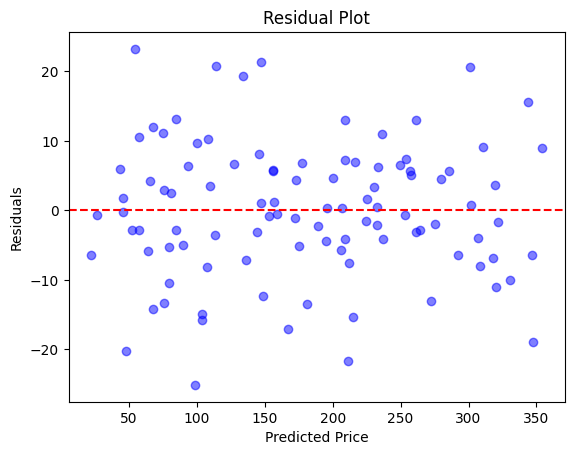

In [ ]:
'''
회귀진단 (Regression Diagnostics)
실생활 예시: 잔차 분석을 통해 모델의 적합성을 평가합니다
'''

# 잔차 계산
residuals = data['Price'] - model.predict(data[['Size', 'Rooms', 'Location_2', 'Location_3']])  # 잔차 계산

# 잔차 플롯
plt.scatter(model.predict(data[['Size', 'Rooms', 'Location_2', 'Location_3']]), residuals, color='blue', alpha=0.5)  # 잔차 산점도
plt.axhline(y=0, color='red', linestyle='--')  # y=0 기준선
plt.xlabel('Predicted Price')  # x축 라벨
plt.ylabel('Residuals')  # y축 라벨
plt.title('Residual Plot')  # 그래프 제목
plt.show()  # 그래프 출력


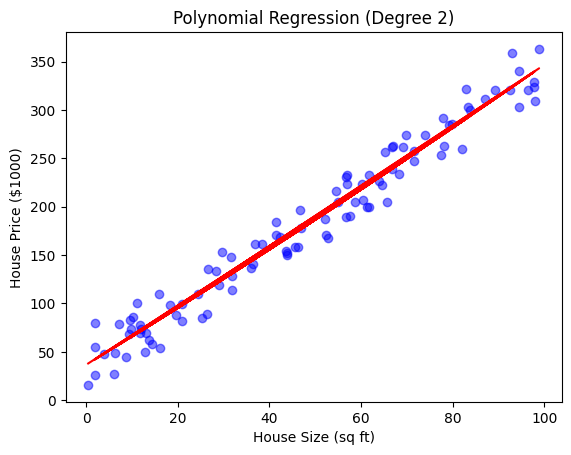

In [ ]:
'''
다항회귀와 스플라인 회귀 (Polynomial and Spline Regression)
실생활 예시: 비선형 관계를 모델링하기 위해 다항회귀와 스플라인 회귀를 사용합니다.
'''

from sklearn.preprocessing import PolynomialFeatures  # PolynomialFeatures를 임포트합니다.
from sklearn.pipeline import make_pipeline  # make_pipeline을 임포트합니다.

# 다항회귀 모델 생성 (2차)
poly = PolynomialFeatures(degree=2)  # 2차 다항식 변환기 생성
poly_model = make_pipeline(poly, LinearRegression())  # 다항회귀 모델 생성
poly_model.fit(data[['Size']], data['Price'])  # 모델 학습

# 다항회귀 회귀선 그리기
plt.scatter(data['Size'], data['Price'], color='blue', alpha=0.5)  # 데이터 산점도
plt.plot(data['Size'], poly_model.predict(data[['Size']]), color='red')  # 다항회귀 회귀선
plt.xlabel('House Size (sq ft)')  # x축 라벨
plt.ylabel('House Price ($1000)')  # y축 라벨
plt.title('Polynomial Regression (Degree 2)')  # 그래프 제목
plt.show()  # 그래프 출력

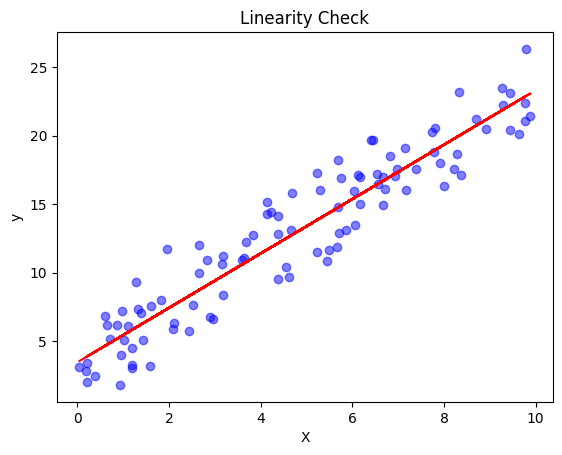

In [ ]:
'''
선형성 확인

선형회귀 모델은 독립 변수와 종속 변수 간의 선형 관계를 가정합니다.
이를 확인하기 위해 산점도와 잔차 플롯을 사용할 수 있습니다.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# 데이터 생성 (예시)
np.random.seed(0)  # 랜덤 시드 설정
X = np.random.rand(100, 1) * 10  # 0에서 10 사이의 랜덤한 독립 변수
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # 종속 변수 (노이즈 추가)

# 데이터프레임 생성
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})  # 데이터프레임 생성

# 선형회귀 모델 생성
model = LinearRegression()  # LinearRegression 모델 생성
model.fit(data[['X']], data['y'])  # 모델 학습

# 산점도와 회귀선 그리기
plt.scatter(data['X'], data['y'], color='blue', alpha=0.5)  # 데이터 산점도
plt.plot(data['X'], model.predict(data[['X']]), color='red')  # 회귀선
plt.xlabel('X')  # x축 라벨
plt.ylabel('y')  # y축 라벨
plt.title('Linearity Check')  # 그래프 제목
plt.show()  # 그래프 출력

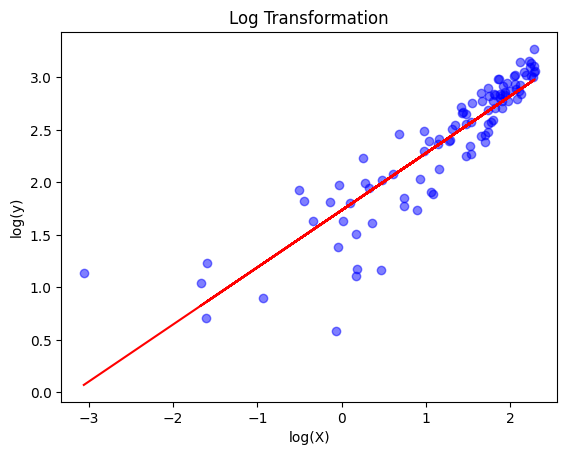

In [ ]:
'''
변수 변환
독립 변수나 종속 변수가 비선형 관계를 보일 때, 로그 변환, 제곱근 변환 등을 통해 선형 관계로 변환할 수 있습니다.
'''
# 로그 변환 예시
data['log_X'] = np.log(data['X'])  # X 변수에 로그 변환 적용
data['log_y'] = np.log(data['y'])  # y 변수에 로그 변환 적용

# 변환된 데이터로 선형회귀 모델 생성
model_log = LinearRegression()  # LinearRegression 모델 생성
model_log.fit(data[['log_X']], data['log_y'])  # 모델 학습

# 산점도와 회귀선 그리기 (로그 변환 후)
plt.scatter(data['log_X'], data['log_y'], color='blue', alpha=0.5)  # 데이터 산점도
plt.plot(data['log_X'], model_log.predict(data[['log_X']]), color='red')  # 회귀선
plt.xlabel('log(X)')  # x축 라벨
plt.ylabel('log(y)')  # y축 라벨
plt.title('Log Transformation')  # 그래프 제목
plt.show()  # 그래프 출력


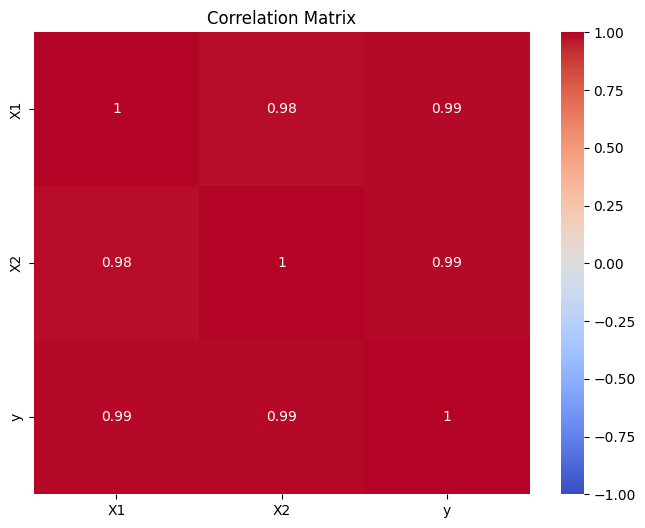

  Feature        VIF
0      X1  65.145171
1      X2  65.145171


In [ ]:
'''
다중공선성 확인
다중공선성은 독립 변수들 간의 강한 상관관계를 의미합니다.
이를 확인하기 위해 분산 팽창 요인(VIF)을 사용할 수 있습니다.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중선형회귀 데이터 생성 (예시)
np.random.seed(0)  # 랜덤 시드 설정
X1 = np.random.rand(100) * 10  # 독립 변수 1
X2 = X1 + np.random.rand(100) * 2  # 독립 변수 2 (X1과 강한 상관관계)
y = 2 * X1 + 3 * X2 + np.random.randn(100) * 2  # 종속 변수

# 데이터프레임 생성
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})  # 데이터프레임 생성

# 상관관계 행렬 계산
corr_matrix = data.corr()  # 상관관계 행렬 계산

# 상관관계 히트맵 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)  # 히트맵 생성
plt.title('Correlation Matrix')  # 그래프 제목
plt.show()  # 그래프 출력

# VIF 계산
X_vif = data[['X1', 'X2']]  # 독립 변수 데이터
vif_data = pd.DataFrame()  # VIF 데이터프레임 생성
vif_data['Feature'] = X_vif.columns  # 변수 이름
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]  # VIF 계산

print(vif_data)  # VIF 출력

<ipython-input-14-446e59ce21dd>:32: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)  # 쿡의 거리 스템 플롯


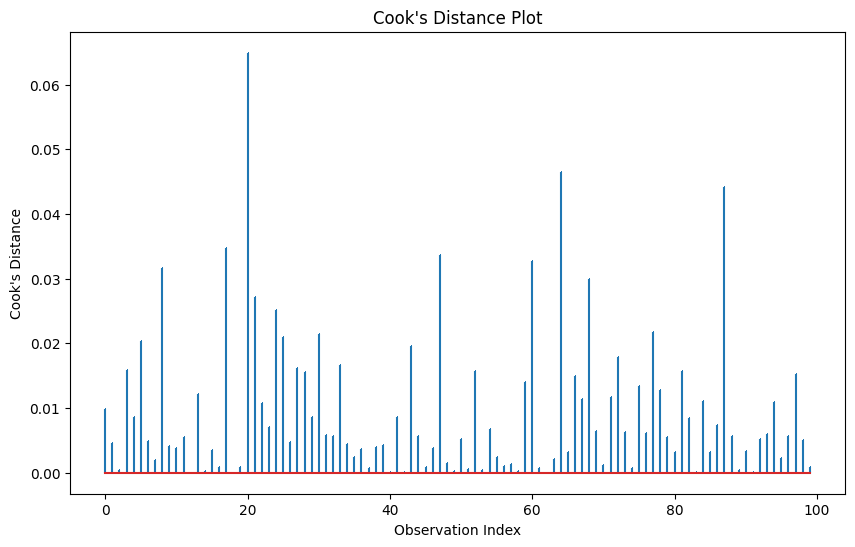

Cook's Distance: [9.87235675e-03 4.56946035e-03 4.82379170e-04 1.59294245e-02
 8.66940258e-03 2.02931126e-02 4.95416253e-03 1.95763079e-03
 3.16441965e-02 4.05820684e-03 3.80235184e-03 5.59038233e-03
 2.69741128e-06 1.21364738e-02 2.96609450e-04 3.49810561e-03
 8.12306555e-04 3.47421833e-02 2.33053024e-05 8.36042991e-04
 6.49472750e-02 2.72372599e-02 1.08070931e-02 6.99678431e-03
 2.51359209e-02 2.10340797e-02 4.68518618e-03 1.62136952e-02
 1.55890374e-02 8.65693836e-03 2.14019148e-02 5.78839785e-03
 5.62185591e-03 1.66527096e-02 4.40940886e-03 2.43177968e-03
 3.64122803e-03 7.24105030e-04 3.97788624e-03 4.28890747e-03
 1.82650548e-04 8.56743200e-03 1.18270848e-04 1.96551409e-02
 5.65014263e-03 8.12163573e-04 3.88532898e-03 3.35926138e-02
 1.45330313e-03 2.50465683e-04 5.14255195e-03 6.07353508e-04
 1.57141986e-02 4.67524418e-04 6.72175197e-03 2.41172978e-03
 1.10564448e-03 1.38321297e-03 2.08240344e-04 1.40282386e-02
 3.27141265e-02 6.74742014e-04 1.41622249e-06 2.15991184e-03
 4.6495

In [ ]:
'''
이상치 영향력 확인

Cook’s Distance
쿡의 거리는 각 데이터 포인트가 회귀 모델에 미치는 영향을 측정합니다.
쿡의 거리가 큰 데이터 포인트는 모델에 큰 영향을 미치는 이상치일 가능성이 높습니다.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 데이터 생성 (예시)
np.random.seed(0)  # 랜덤 시드 설정
X = np.random.rand(100, 1) * 10  # 0에서 10 사이의 랜덤한 독립 변수
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # 종속 변수 (노이즈 추가)

# 데이터프레임 생성
data = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})  # 데이터프레임 생성

# 선형회귀 모델 생성
X_with_const = sm.add_constant(data['X'])  # 상수항 추가
model = sm.OLS(data['y'], X_with_const).fit()  # OLS 회귀 모델 생성 및 학습

# 쿡의 거리 계산
influence = model.get_influence()  # 영향력 객체 생성
cooks_d = influence.cooks_distance[0]  # 쿡의 거리 계산

# 쿡의 거리 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)  # 쿡의 거리 스템 플롯
plt.xlabel('Observation Index')  # x축 라벨
plt.ylabel("Cook's Distance")  # y축 라벨
plt.title("Cook's Distance Plot")  # 그래프 제목
plt.show()  # 그래프 출력

# 쿡의 거리 값 출력
print(f"Cook's Distance: {cooks_d}")  # 쿡의 거리 값 출력

# 이상치 확인 (쿡의 거리 > 4/n)
n = len(data)  # 데이터 포인트 수
outliers = np.where(cooks_d > 4/n)[0]  # 이상치 인덱스
print(f"Outliers: {outliers}")  # 이상치 인덱스 출력

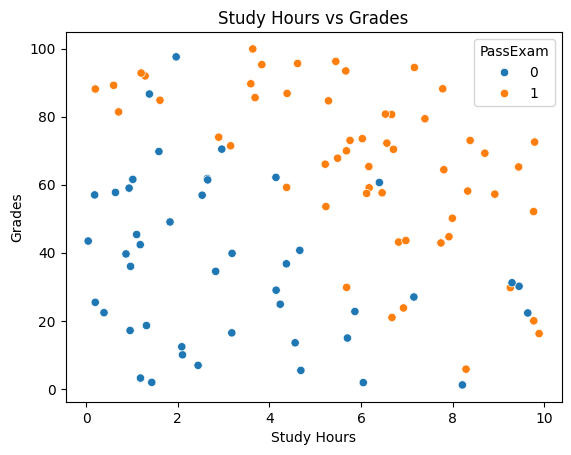

Without Scaling:
Accuracy: 0.8
Confusion Matrix:
[[9 2]
 [2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


With Scaling:
Accuracy: 0.8
Confusion Matrix:
[[9 2]
 [2 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20


Coefficients without Scaling: [[0.7898547  0.08738328]]
Intercept without Scaling: [-8.15939528]

Coefficients with Scaling: [[1.66925434 1.77407147]]
Intercept with Scaling

In [ ]:
'''
정규화의 필요성
스케일 차이로 인한 문제:
독립 변수들이 서로 다른 스케일을 가질 때, 회귀 모델의 계수 추정에 영향을 미칠 수 있습니다.
예를 들어, 한 변수는 0에서 1 사이의 값을 가지는 반면, 다른 변수는 0에서 1000 사이의 값을 가질 수 있습니다. 이 경우, 큰 스케일을 가진 변수가 모델에 더 큰 영향을 미치게 됩니다.

수렴 속도 향상:
정규화는 경사 하강법과 같은 최적화 알고리즘의 수렴 속도를 향상시킵니다.
데이터가 정규화되지 않으면, 최적화 과정에서 일부 변수의 영향이 과도하게 커져 수렴이 느려질 수 있습니다.

해석 용이성:
정규화된 데이터는 회귀 계수의 해석을 용이하게 합니다.
모든 변수가 동일한 스케일을 가지면, 회귀 계수의 크기를 비교하여 각 변수의 상대적인 중요성을 쉽게 파악할 수 있습니다.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 데이터 생성 (예시)
np.random.seed(0)  # 랜덤 시드 설정
study_hours = np.random.rand(100) * 10  # 0에서 10 사이의 랜덤한 공부 시간
grades = np.random.rand(100) * 100  # 0에서 100 사이의 랜덤한 성적
pass_exam = (study_hours + grades / 10 + np.random.randn(100) * 2 > 10).astype(int)  # 합격 여부 (0 또는 1)

# 데이터프레임 생성
data = pd.DataFrame({'StudyHours': study_hours, 'Grades': grades, 'PassExam': pass_exam})  # 데이터프레임 생성

# 데이터 시각화
sns.scatterplot(x='StudyHours', y='Grades', hue='PassExam', data=data)  # 산점도
plt.xlabel('Study Hours')  # x축 라벨
plt.ylabel('Grades')  # y축 라벨
plt.title('Study Hours vs Grades')  # 그래프 제목
plt.show()  # 그래프 출력

# 데이터 분할 (훈련 세트와 테스트 세트)
X = data[['StudyHours', 'Grades']]  # 독립 변수 설정
y = data['PassExam']  # 종속 변수 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 데이터 분할

# 정규화하지 않은 경우
model_no_scaling = LogisticRegression()  # LogisticRegression 모델 생성
model_no_scaling.fit(X_train, y_train)  # 모델 학습
y_pred_no_scaling = model_no_scaling.predict(X_test)  # 테스트 세트 예측

# 정규화한 경우
scaler = StandardScaler()  # StandardScaler 객체 생성
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 세트 정규화
X_test_scaled = scaler.transform(X_test)  # 테스트 세트 정규화
model_scaling = LogisticRegression()  # LogisticRegression 모델 생성
model_scaling.fit(X_train_scaled, y_train)  # 모델 학습
y_pred_scaling = model_scaling.predict(X_test_scaled)  # 테스트 세트 예측

# 평가
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)  # 정확도 계산 (정규화하지 않은 경우)
accuracy_scaling = accuracy_score(y_test, y_pred_scaling)  # 정확도 계산 (정규화한 경우)
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)  # 혼동 행렬 계산 (정규화하지 않은 경우)
conf_matrix_scaling = confusion_matrix(y_test, y_pred_scaling)  # 혼동 행렬 계산 (정규화한 경우)
class_report_no_scaling = classification_report(y_test, y_pred_no_scaling)  # 분류 보고서 생성 (정규화하지 않은 경우)
class_report_scaling = classification_report(y_test, y_pred_scaling)  # 분류 보고서 생성 (정규화한 경우)

print("Without Scaling:")
print(f"Accuracy: {accuracy_no_scaling}")  # 정확도 출력 (정규화하지 않은 경우)
print(f"Confusion Matrix:\n{conf_matrix_no_scaling}")  # 혼동 행렬 출력 (정규화하지 않은 경우)
print(f"Classification Report:\n{class_report_no_scaling}")  # 분류 보고서 출력 (정규화하지 않은 경우)

print("\nWith Scaling:")
print(f"Accuracy: {accuracy_scaling}")  # 정확도 출력 (정규화한 경우)
print(f"Confusion Matrix:\n{conf_matrix_scaling}")  # 혼동 행렬 출력 (정규화한 경우)
print(f"Classification Report:\n{class_report_scaling}")  # 분류 보고서 출력 (정규화한 경우)

# 로지스틱 회귀 계수 출력
print("\nCoefficients without Scaling:", model_no_scaling.coef_)  # 회귀 계수 출력 (정규화하지 않은 경우)
print("Intercept without Scaling:", model_no_scaling.intercept_)  # 절편 출력 (정규화하지 않은 경우)
print("\nCoefficients with Scaling:", model_scaling.coef_)  # 회귀 계수 출력 (정규화한 경우)
print("Intercept with Scaling:", model_scaling.intercept_)  # 절편 출력 (정규화한 경우)
